In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import scipy.stats as st 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
C:\Users\anubh\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("Admission_Prediction.csv")

In [3]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76


In [4]:
df.shape

(500, 9)

In [5]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.500000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [7]:
for i in df:
    print(i)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR
CGPA
Research
Chance of Admit


In [8]:
for i in df:
    if df[i].isna().sum()>0:
        df[i].fillna(df[i].median(),inplace = True)

In [9]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.drop(columns = "Serial No.",inplace = True)

### Assumptions

1) Normally distributed data 

In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

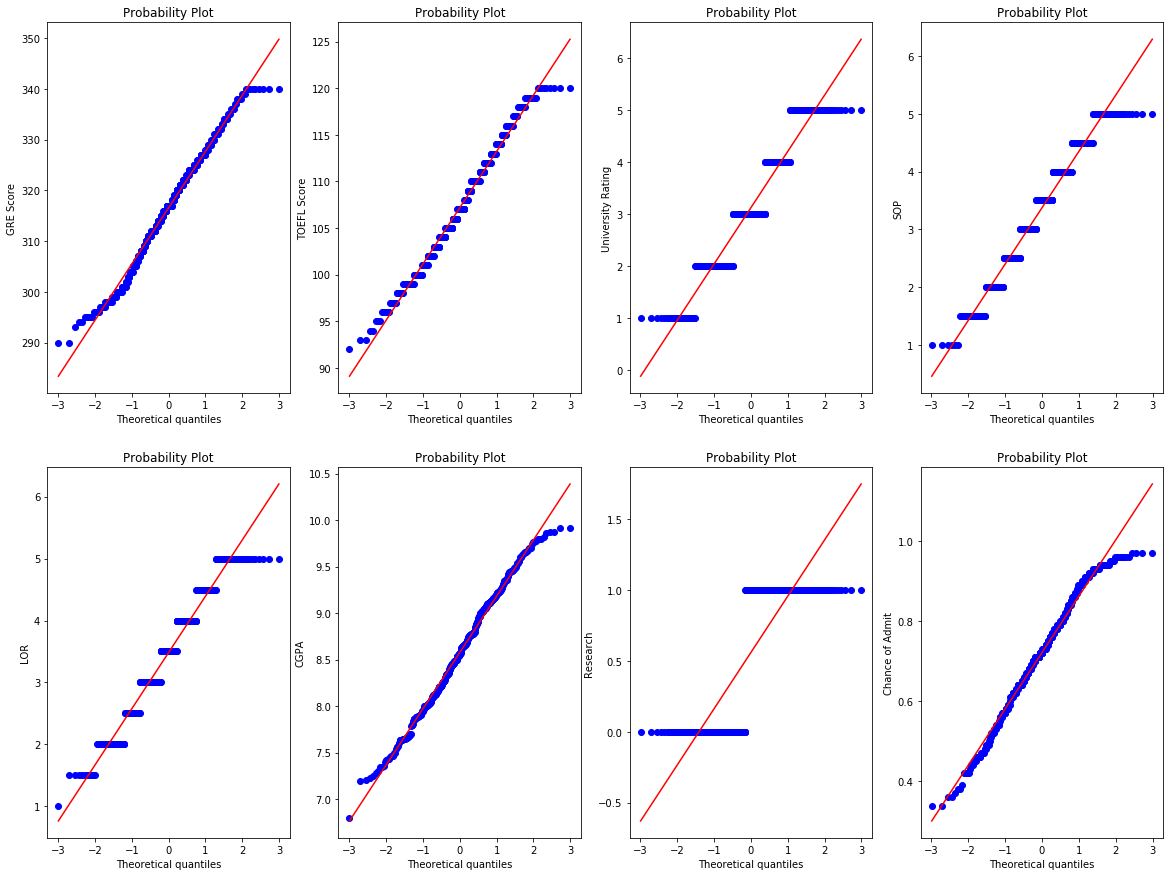

In [12]:
col = 1
plt.figure(figsize = (20,15))
for i in df.columns:
    if col<9:
        plt.subplot(2,4,col)
        
        st.probplot(df[i],dist = "norm",plot = pylab)
        plt.ylabel(i)
        
    col=col+1
        
        

In [13]:
df.skew()

GRE Score           -0.056060
TOEFL Score          0.104963
University Rating    0.102097
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

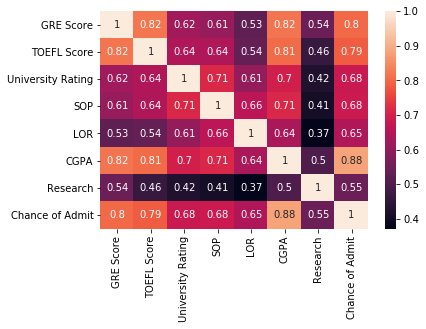

In [14]:
x = df.corr()
sns.heatmap(x,annot = True);

In [15]:
X = df.drop(columns = ["Chance of Admit"])
y = df["Chance of Admit"]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 123)

In [17]:
X_train.shape

(425, 7)

In [18]:
X_test.shape

(75, 7)

In [19]:
y_train.shape

(425,)

In [20]:
y_test.shape

(75,)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_pred

array([0.80468447, 0.93563559, 0.52993714, 0.62159311, 0.81789247,
       0.70647813, 0.87319445, 0.77559099, 0.62109158, 0.88218259,
       0.90446955, 0.7601042 , 0.95424962, 0.58328316, 0.72414563,
       0.83629658, 0.51718802, 0.77315851, 0.94230804, 0.61516719,
       0.57688245, 0.74972945, 0.85541805, 0.68854065, 0.828594  ,
       0.65171773, 0.5819462 , 0.62296022, 0.97362228, 0.87884491,
       0.53174331, 0.71150931, 0.65417509, 0.6896344 , 0.47156598,
       0.85281771, 0.85607026, 0.77058453, 0.93764143, 0.61337178,
       0.63464114, 0.7167425 , 0.6667838 , 0.90816864, 0.80800637,
       0.72460511, 0.64554645, 0.67544885, 0.95948231, 0.84999852,
       0.75641208, 0.60005815, 0.64230063, 0.69205385, 0.55526641,
       0.54214641, 0.68598461, 0.50905588, 0.58757074, 0.68865919,
       0.88365014, 0.84594952, 0.77902514, 0.53432883, 0.62005607,
       0.9071265 , 0.89080299, 0.83857944, 0.83408209, 0.88595933,
       0.63737611, 0.75703765, 0.62380628, 0.83484629, 0.55539

In [25]:
mse(y_test,y_pred)

0.004048526940759501

In [26]:
mae(y_test,y_pred)

0.04315534039957494

In [27]:
r2_score(y_test,y_pred)

0.8062380006417716

In [28]:
lr.coef_

array([0.00203336, 0.00286689, 0.00272256, 0.00170839, 0.01666822,
       0.11987004, 0.02629287])

In [29]:
lr.intercept_

-1.3446914413661122

In [30]:
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [31]:
vif = pd.DataFrame()

In [32]:
len(X.columns)

7

In [33]:
variables  = X_scaled
variables.shape[1]

7

In [34]:
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

In [35]:
vif

,VIF
0,4.154712
1,3.795794
2,2.517273
3,2.776399
4,2.037378
5,4.653172
6,1.458962


In [36]:
vif["Features"] = X.columns

In [37]:
vif

,VIF,Features
0,4.154712,GRE Score
1,3.795794,TOEFL Score
2,2.517273,University Rating
3,2.776399,SOP
4,2.037378,LOR
5,4.653172,CGPA
6,1.458962,Research


In [38]:
# # here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
# vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# # Finally, I like to include names so it is easier to explore the result
# vif["Features"] = X.columns

In [39]:
# pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

In [40]:
# vif["VIF"]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state = 123)

In [43]:
X_train.shape

(400, 7)

In [44]:
X_test.shape

(100, 7)

In [45]:
y_train.shape

(400,)

In [46]:
y_test.shape

(100,)

In [47]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [48]:
lr1.coef_

array([0.02318986, 0.0188088 , 0.00186886, 0.00120479, 0.0137315 ,
       0.07330447, 0.01305188])

In [49]:
lr1.intercept_

0.7218646674579712

In [50]:
y_pred1 = lr1.predict(X_test)
y_pred1

array([0.8072533 , 0.93536076, 0.53092607, 0.62209572, 0.81995684,
       0.70108507, 0.87576041, 0.77881907, 0.62033349, 0.88277391,
       0.90368017, 0.76516142, 0.9534223 , 0.5857042 , 0.72317875,
       0.83580722, 0.51799891, 0.7676637 , 0.9408666 , 0.61832288,
       0.57520499, 0.75012435, 0.85265313, 0.69024621, 0.83399476,
       0.65271582, 0.57992229, 0.62648134, 0.97552063, 0.87925791,
       0.53229348, 0.71074838, 0.65730785, 0.68951802, 0.47317654,
       0.85144945, 0.85598383, 0.76825526, 0.93934199, 0.61308947,
       0.63565805, 0.71874412, 0.66472146, 0.90959884, 0.80711537,
       0.72220683, 0.64677272, 0.67589626, 0.96337493, 0.84762766,
       0.7575147 , 0.59911897, 0.64251604, 0.69241981, 0.55410511,
       0.54524581, 0.68725625, 0.50935691, 0.58711681, 0.6860309 ,
       0.88206518, 0.84505062, 0.78276565, 0.53598055, 0.6220349 ,
       0.90608676, 0.88816004, 0.83610797, 0.83438362, 0.88770361,
       0.6368749 , 0.75598678, 0.62530589, 0.83653431, 0.55729

In [51]:
r2_score(y_test,y_pred1)

0.779107210310312

In [57]:
mse  = mse(y_test,y_pred1)

In [58]:
np.sqrt(mse)

0.06582542498964275